In [27]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from word2number import w2n
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [28]:
data=pd.read_csv('car_evaluation.csv',header=None)
data.columns=['buying price','maintenance cost','doors','persons','lug_boot','safety','decision']

In [29]:
data

,buying price,maintenance cost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [30]:
data.dtypes

buying price        object
maintenance cost    object
doors               object
persons             object
lug_boot            object
safety              object
decision            object
dtype: object

In [31]:
print(data['buying price'].unique())
print(data['maintenance cost'].unique())
print(data['doors'].unique())
print(data['persons'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']


In [32]:
data['persons']=data['persons'].replace({'2':2,'4':4,'more':5})
data['doors']=data['doors'].replace({'2':2,'4':4,'5more':5})

In [33]:
data

,buying price,maintenance cost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good


In [34]:
price=LabelEncoder()
cost=LabelEncoder()
lug=LabelEncoder()
safety=LabelEncoder()

data['buying price']=price.fit_transform(data['buying price'])
data['maintenance cost']=cost.fit_transform(data['maintenance cost'])
data['lug_boot']=lug.fit_transform(data['lug_boot'])
data['safety']=safety.fit_transform(data['safety'])


In [9]:
data

,buying price,maintenance cost,doors,persons,lug_boot,safety,decision
0,3,3,2,2,2,1,unacc
1,3,3,2,2,2,2,unacc
2,3,3,2,2,2,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,5,5,1,2,good
1724,1,1,5,5,1,0,vgood
1725,1,1,5,5,0,1,unacc
1726,1,1,5,5,0,2,good


In [35]:
x=data.drop('decision',axis=1)
y=data['decision']

In [36]:
model=DecisionTreeClassifier()

In [37]:
model.fit(x,y)

DecisionTreeClassifier()

In [38]:
model.get_depth()

14

In [39]:
model.score(x,y)

1.0

In [40]:
y_pred=model.predict(x)
pd.DataFrame({'True Values':y,'Predictions':y_pred})

,True Values,Predictions
0,unacc,unacc
1,unacc,unacc
2,unacc,unacc
3,unacc,unacc
4,unacc,unacc
...,...,...
1723,good,good
1724,vgood,vgood
1725,unacc,unacc
1726,good,good


In [41]:
cm=confusion_matrix(y,y_pred)
print(cm)

[[ 384    0    0    0]
 [   0   69    0    0]
 [   0    0 1210    0]
 [   0    0    0   65]]


Text(50.722222222222214, 0.5, 'True Values')

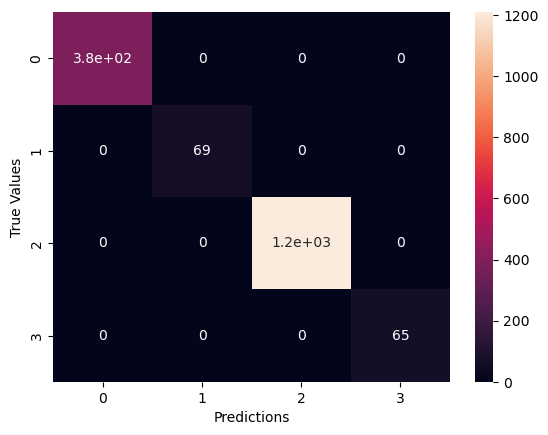

In [42]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')

In [43]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       384
        good       1.00      1.00      1.00        69
       unacc       1.00      1.00      1.00      1210
       vgood       1.00      1.00      1.00        65

    accuracy                           1.00      1728
   macro avg       1.00      1.00      1.00      1728
weighted avg       1.00      1.00      1.00      1728



In [22]:
# from sklearn import tree
# fig=plt.figure(figsize=(15,15))
# tree.plot_tree(model,feature_names=x.columns,class_names='decision',filled=True)

In [45]:
price_=input("Enter a buying Price:['vhigh' ,'high', 'med', 'low']\n")
price_=int(price.transform([price_]))

cost_=input("Enter Main Cost:['vhigh' ,'high', 'med', 'low']\n")
cost_=int(cost.transform([cost_]))

doors_=input("Enter no of doors:[2,3,4,5]\n")
persons=input("Enter no of persons:[2,4,5]\n")

lugboot_=input("Enter Lug Boot:['small','med','big']\n")
lugboot_=int(lug.transform([lugboot_]))


safety_=input("Enter Safety Range:['low','med','high']\n")
safety_=int(safety.transform([safety_]))

Enter a buying Price:['vhigh' ,'high', 'med', 'low']
low
Enter Main Cost:['vhigh' ,'high', 'med', 'low']
low
Enter no of doors:[2,3,4,5]
2
Enter no of persons:[2,4,5]
5
Enter Lug Boot:['small','med','big']
small
Enter Safety Range:['low','med','high']
low


In [47]:
model.predict([[price_,cost_,doors_,persons,lugboot_,safety_]])

C:\Users\Amjad\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['unacc'], dtype=object)